## Log function

$$\log_a(b) = c \quad \iff \quad a^c = b$$

# Interactive log plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider


# Define the plotting function
def plot_log(vline_position=0.5):
    x = np.linspace(0.01, 1, 100)  # Generate a range of probabilities
    y = np.log(x)  # Compute logarithm values
    
    plt.figure(figsize=(8, 5))
    
    # Plot log(x) curve
    plt.plot(x, y, label=r"$\log(x)$", color='blue')
    
    # Plot a vertical line at the selected x position (line from curve to x-axis)
    plt.plot(
        [vline_position, vline_position], 
        [0, np.log(vline_position)], 
        color='red', 
        linestyle='--'
    )
    
    # Plot a horizontal line at the selected y position (projection to y-axis)
    plt.plot(
        [0, vline_position],
        [np.log(vline_position), np.log(vline_position)], color='green',
        linestyle='--'
    )
    
    # Add point marker at the selected x position
    plt.plot(vline_position, np.log(vline_position), 'ro')  # Mark the point on the curve
    
    # Display the selected x value on the x-axis
    plt.text(
        vline_position,
        0,
        f'{vline_position:.2f}',
        horizontalalignment='center',
        verticalalignment='bottom',
        color='black'
    )

    # Display the selected x value on the x-axis
    plt.text(
        0,
        np.log(vline_position),
        f'{np.log(vline_position):.2f}',
        horizontalalignment='center',
        verticalalignment='bottom',
        color='black'
    )
    
    # Title and labels
    plt.title('Logarithmic Function Behavior')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Logarithm Value')
    plt.grid(True)

    plt.legend([
        r"$\log(x)$",
        f'x = {vline_position:.2f}',
        f'y = {np.log(vline_position):.2f}'
    ])
    plt.show()


# Create an interactive widget
interact(
    plot_log,
    vline_position=FloatSlider(
        value=0.5,
        min=0.01,
        max=0.99,
        step=0.01,
        description='x position'
    )
)


interactive(children=(FloatSlider(value=0.5, description='x position', max=0.99, min=0.01, step=0.01), Output(…

<function __main__.plot_log(vline_position=0.5)>

## Log function: high vs low

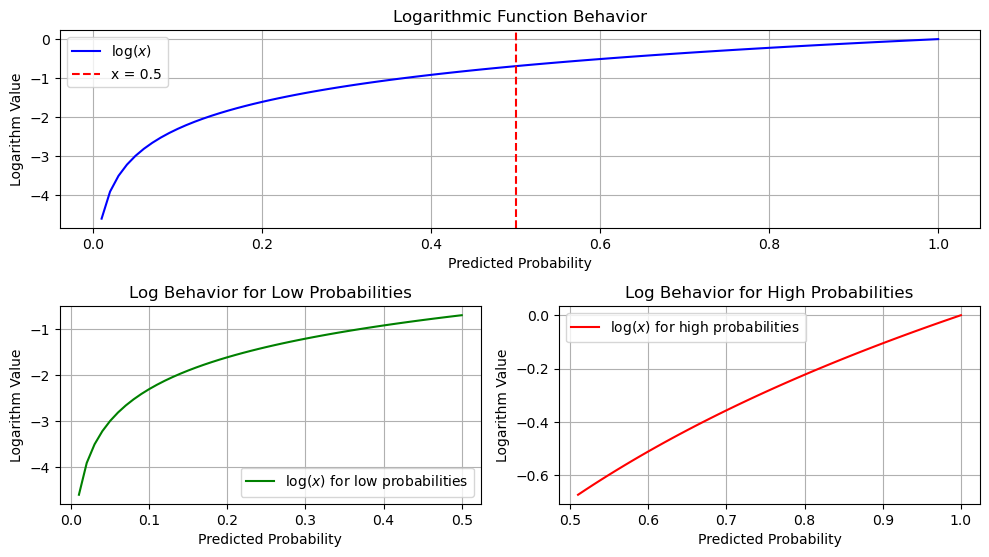

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of probabilities from 0.01 to 1
x = np.linspace(0.01, 1, 100)

# Plot log(x)
plt.figure(figsize=(10, 8))

# First subplot: showing the entire range
plt.subplot(3, 1, 1)
plt.plot(x, np.log(x), label=r'$\log(x)$', color='blue')
plt.axvline(x=0.5, color='red', linestyle='--', label='x = 0.5')
plt.title('Logarithmic Function Behavior')
plt.xlabel('Predicted Probability')
plt.ylabel('Logarithm Value')
plt.grid(True)
plt.legend()

# Second subplot: zoom in on the low probability region
plt.subplot(3, 2, 3)
plt.plot(x[:50], np.log(x[:50]), label=r'$\log(x)$ for low probabilities', color='green')
plt.title('Log Behavior for Low Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Logarithm Value')
plt.grid(True)
plt.legend()

# Third subplot: zoom in on the high probability region
plt.subplot(3, 2, 4)
plt.plot(x[50:], np.log(x[50:]), label=r'$\log(x)$ for high probabilities', color='red')
plt.title('Log Behavior for High Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Logarithm Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Binary Cross-Entropy (BCE)

$$\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(p_i) + (1 - y_i) \log(1 - p_i)$$

## Binary Cross-Entropy derivative

$$\frac{\partial \ell_i}{\partial p_i} = \frac{p_i - y_i}{p_i (1 - p_i)}$$


## BCE code

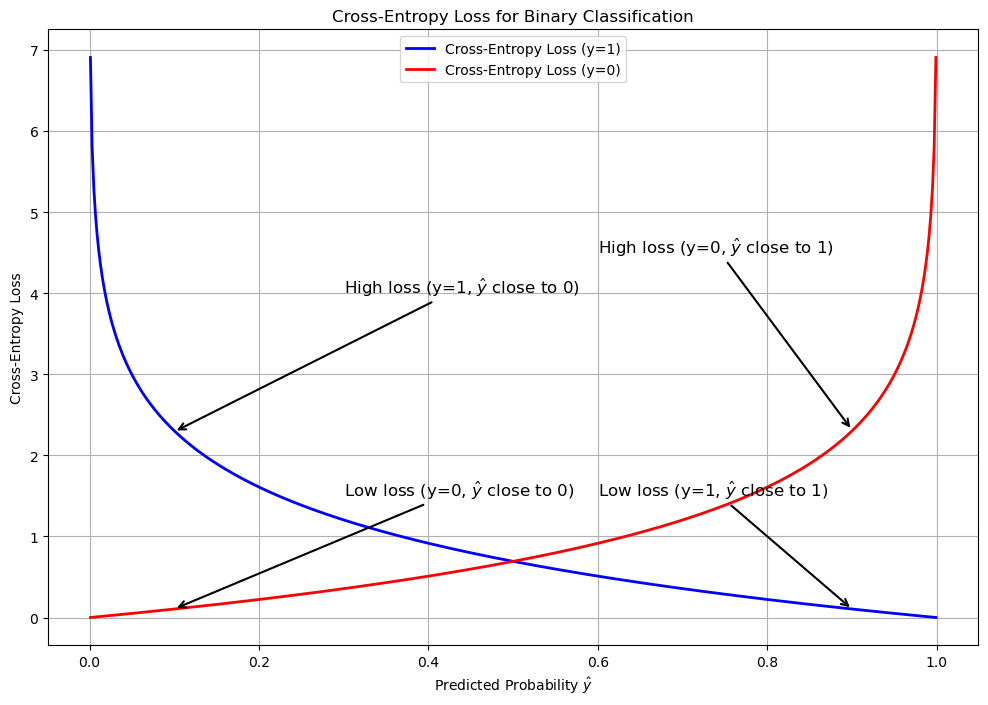

In [3]:
import numpy as np
import matplotlib.pyplot as plt


class BinaryCrossEntropy:
    def forward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        return -(target * np.log(pred + epsilon) + (1 - target) * np.log(1 - pred + epsilon))

    def backward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        return (pred - target) / (pred * (1 - pred) + epsilon)


# Generate values for y_hat (predicted probabilities)
y_pred = np.linspace(0.001, 0.999, 500)  # Predicted probabilities from 0 to 1 (avoid log(0))

# True labels for binary classification
y_true_1 = np.ones_like(y_pred)  # Case where true label is 1 (positive class)
y_true_0 = np.zeros_like(y_pred)  # Case where true label is 0 (negative class)

loss = BinaryCrossEntropy()

# Compute cross-entropy loss for both cases
loss_for_1 = loss.forward(y_pred, y_true_1)
loss_for_0 = loss.forward(y_pred, y_true_0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot loss for y=1 (positive class)
plt.plot(
    y_pred,
    loss_for_1,
    label='Cross-Entropy Loss (y=1)',
    color='blue',
    linewidth=2
)

# Plot loss for y=0 (negative class)
plt.plot(
    y_pred,
    loss_for_0,
    label='Cross-Entropy Loss (y=0)',
    color='red',
    linewidth=2
)

# Annotating key points with clear arrows
plt.annotate(
    r'Low loss (y=1, $\hat{y}$ close to 1)', 
    xy=(0.9, loss_for_1[450]),
    xytext=(0.6, 1.5),
    arrowprops=dict(facecolor='blue', arrowstyle="->", lw=1.5),
    fontsize=12
)

plt.annotate(
    r'High loss (y=1, $\hat{y}$ close to 0)', 
    xy=(0.1, loss_for_1[50]),
    xytext=(0.3, 4.0),
    arrowprops=dict(facecolor='blue', arrowstyle="->", lw=1.5),
    fontsize=12
)

plt.annotate(
    r'Low loss (y=0, $\hat{y}$ close to 0)', 
    xy=(0.1, loss_for_0[50]),
    xytext=(0.3, 1.5),
    arrowprops=dict(facecolor='red', arrowstyle="->", lw=1.5),
    fontsize=12
)

plt.annotate(
    r'High loss (y=0, $\hat{y}$ close to 1)', 
    xy=(0.9, loss_for_0[450]),
    xytext=(0.6, 4.5),
    arrowprops=dict(facecolor='red', arrowstyle="->", lw=1.5),
    fontsize=12
)

# Titles and labels
plt.title('Cross-Entropy Loss for Binary Classification')
plt.xlabel(r'Predicted Probability $\hat{y}$')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


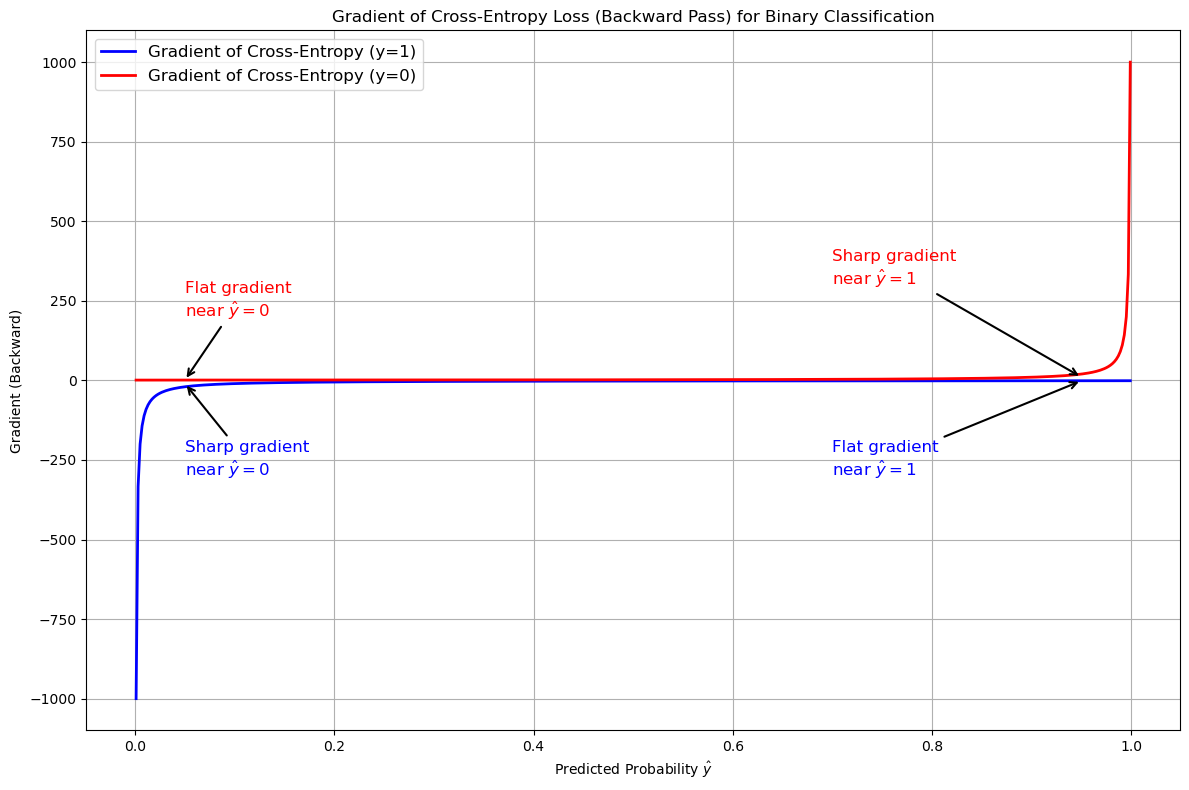

In [4]:
# Generate values for y_hat (predicted probabilities)
y_pred = np.linspace(0.001, 0.999, 500)  # Predicted probabilities from 0 to 1 (avoid log(0))

# True labels for binary classification
y_true_1 = np.ones_like(y_pred)  # Case where true label is 1 (positive class)
y_true_0 = np.zeros_like(y_pred)  # Case where true label is 0 (negative class)

loss = BinaryCrossEntropy()

# Compute the gradient for both cases (y=1 and y=0)
grad_for_1 = loss.backward(y_pred, y_true_1)
grad_for_0 = loss.backward(y_pred, y_true_0)


# Plotting the gradient (backward pass)
plt.figure(figsize=(12, 8))

# Gradient for y=1 (true label is 1)
plt.plot(y_pred, grad_for_1, label='Gradient of Cross-Entropy (y=1)', color='blue', linewidth=2)

# Gradient for y=0 (true label is 0)
plt.plot(y_pred, grad_for_0, label='Gradient of Cross-Entropy (y=0)', color='red', linewidth=2)


# Annotate key points for intuition
plt.annotate('Sharp gradient\nnear $\\hat{y} = 0$', 
             xy=(0.05, grad_for_1[50]), xytext=(0.05, -300),
             arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),
             fontsize=12, color='blue')

plt.annotate('Flat gradient\nnear $\\hat{y} = 0$', 
             xy=(0.05, grad_for_0[50]), xytext=(0.05, 200),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12, color='red')

plt.annotate('Sharp gradient\nnear $\\hat{y} = 1$', 
             xy=(0.95, grad_for_0[450]), xytext=(0.7, 300),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12, color='red')

plt.annotate('Flat gradient\nnear $\\hat{y} = 1$', 
             xy=(0.95, grad_for_1[450]), xytext=(0.7, -300),
             arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),
             fontsize=12, color='blue')


# Titles and labels
plt.title('Gradient of Cross-Entropy Loss (Backward Pass) for Binary Classification')
plt.xlabel('Predicted Probability $\\hat{y}$')
plt.ylabel('Gradient (Backward)')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# Binary Cross-Entropy loss

In [5]:
import numpy as np


class BinaryCELoss:
    r"""
    Binary Cross-Entropy Loss module.

    Computes the Binary Cross-Entropy loss and its gradient during the forward and backward passes.
    This is typically used for binary classification tasks.
    """

    def forward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        r"""
        Compute the Binary Cross-Entropy loss between the predicted values and the target values.

        Args:
            pred (np.ndarray): The predicted values from the model.
            target (np.ndarray): The true target values.
            epsilon (float): A small value to avoid log(0) which can lead to numerical instability.

        Returns:
            np.ndarray: The computed Binary Cross-Entropy loss. Scalar for binary classification.
        """

        loss = -(target * np.log(pred + epsilon) + (1 - target) * np.log(1 - pred + epsilon))

        # Average the loss over the batch size
        return np.mean(loss)

    def backward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        r"""
        Compute the gradient of the Binary Cross-Entropy loss with respect to the predicted values.

        Args:
            pred (np.ndarray): The predicted values from the model.
            target (np.ndarray): The true target values.
            epsilon (float): A small value to avoid log(0) which can lead to numerical instability.

        Returns:
            np.ndarray: The gradient of the loss with respect to the predictions.
        """

        grad = (pred - target) / (pred * (1 - pred) + epsilon)

        # you should not average the gradients!
        # instead, you should return the gradient for each example,
        # as gradients represent how much the loss changes with
        # respect to each individual prediction.

        return grad


## Multiclass Cross-Entropy

In [6]:
class CrossEntropyLoss:
    def forward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        """
        Compute the Cross-Entropy loss for multiclass classification.

        Args:
            pred (np.ndarray): The predicted class probabilities from the model.
            target (np.ndarray): The one-hot encoded true target values.
            epsilon (float): A small value to avoid log(0) for numerical stability.

        Returns:
            np.ndarray: The computed Cross-Entropy loss. Scalar for multiclass classification.
        """

        # Clip predictions to avoid log(0)
        pred = np.clip(pred, epsilon, 1. - epsilon)
        
        # Compute cross-entropy loss for each class
        loss = -np.sum(target * np.log(pred), axis=1)  # sum over classes for each example

        return np.mean(loss)

    def backward(self, pred: np.ndarray, target: np.ndarray, epsilon: float = 1e-7) -> np.ndarray:
        """
        Compute the gradient of the Cross-Entropy loss with respect to the predicted values.

        Args:
            pred (np.ndarray): The predicted class probabilities from the model.
            target (np.ndarray): The one-hot encoded true target values.
            epsilon (float): A small value to avoid log(0) for numerical stability.

        Returns:
            np.ndarray: The gradient of the loss with respect to the predictions.
        """
        
        # Clip predictions to avoid log(0)
        pred = np.clip(pred, epsilon, 1. - epsilon)
        
        # Compute the gradient of the loss with respect to predictions
        grad = (pred - target) / pred.shape[0]  # average gradient over batch
        
        return grad
